# Evaluación de un sistema de suspensión neumático semi-activo

En todo vehículo se pueden distinguir dos grandes grupos en los elementos que lo componen:

**La Masa Suspendida**: que es la parte de la masa del vehículo que es soportada por el sistema de suspensión. Estaría constituida por el chasis, grupo motor, carrocería, etc., además de la carga y ocupantes del vehículo.

**La Masa No Suspendida**: que es la formada por el sistema de suspensión y los elementos que conectan dicho sistema con el terreno. Son las ruedas, frenos del vehículo (si están incluidos fuera del chasis), elementos de transmisión, ejes, etc.

El sistema de suspensión de un vehículo es el conjunto de componentes mecánicos que unen la parte suspendida del vehículo con la superficie rodante, con el objetivo primordial de mantener siempre el contacto de la rueda con el terreno, de manera que se consiga, por una parte, un mayor control y seguridad del vehículo dado que toda suspensión va a contribuir a mejorar la estabilidad del vehículo, mejorando la adherencia y la respuesta de la dirección, y por otra, que también sirva para absorber las irregularidades del terreno de manera que proporcione una mayor comodidad a los ocupantes del vehículo.

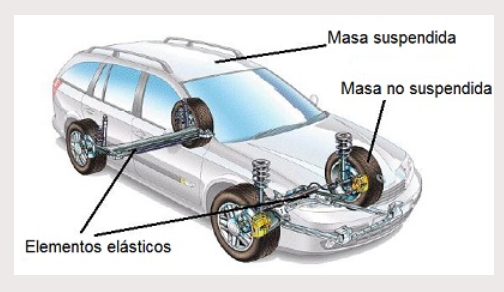

Los sistemas de suspensión se clasifican en pasivos, activos y semi-activos. Los sistemas de suspensión pasivos se encuentran conformados por elementos pasivos como masas,bobinas o muelles y amortiguadores, los cuales no introducen energía al sistema. En el caso de los sistemas de suspensión activa, los elementos pasivos (muelle y amortiguador) son reemplazados por un elemento activo (actuador hidráulico) que es capaz de generar fuerzas mediante un algoritmo de control, para compensar la falta de los elementos pasivos. Los sistemas de suspensión semi–activos actúan introduciendo fuerzas que son capaces de modificar la rigidez del muelle o del amortiguador mediante subsistemas realimentados que generan una orden para que funcione un actuador, por lo que puede adaptarse a diferentes condiciones de manejo y carretera, proporcionando un equilibrio entre comodidad y estabilidad. Este sistema puede ser modelado mediante ecuaciones diferenciales que describen el movimiento de los componentes del sistema.

El sistema de suspensión neumático semi–activo a estudiar es un modelo correspondiente a la cuarta parte del vehículo, ya que el mismo tiene muchas de las características esenciales de los sistemas de suspensión, procurando la simplicidad del modelo. Este se encuentra compuesto por cuatro elementos pasivos y un elemento activo. El primer grupo está constituido por las masas del conjunto conductor–asiento y del conjunto caucho–rin, un amortiguador hidráulico y una bobina de forma helicoidal (espiral). El agente activo proviene de un subsistema de lazo cerrado con realimentación que genera fuerzas para compensar el balanceo y cabeceo del vehículo. Es importante destacar que para conformar el modelo del sistema de suspensión neumático semi–activo se incluirá solamente la salida del subsistema activo.

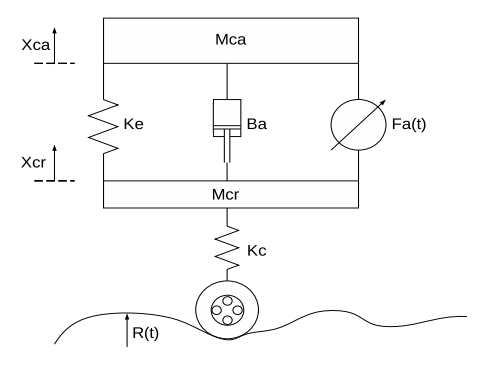

### Parámetros del Sistema
Los parámetros del sistema son los siguientes:
1. Masa del conjunto conductor-asiento ($M_{ca}$)
2. Masa del conjunto caucho-rin ($M_{cr}$)
3. Constante de elasticidad de la bobina ($K_e$)
4. Coeficiente de amortiguación ($B_a$)
5. Constante de elasticidad del caucho ($K_c$)
6. Fuerza de control activa ($F_a$) (considerando que es un sistema semi-activo)
7. Perturbación de entrada de la vía (R)

Con estos diagramas se busca definir las fuerzas externas que intervienen en los dos elementos de interés: la masa del conjunto conductor–asiento (Mac) y la masa del conjunto caucho–rin (Mcr), para analizar luego el comportamiento dinámico de las respuestas de estos dos elementos ante posibles perturbaciones en la vía. 

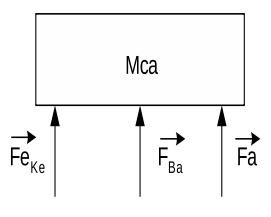
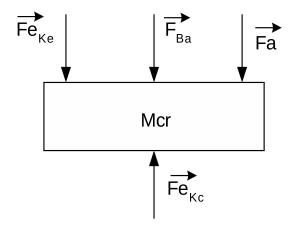

### Ecuaciones Diferenciales
A partir de los diagramas de cuerpo libre elaborados se puede aplicar la segunda Ley de Newton para realizar la sumatoria de fuerzas sobre el eje vertical, para ambas masas y obtener las ecuaciones diferenciales que describen al sistema. Las ecuaciones diferenciales del sistema son las siguientes:
$$
\frac{d X_{ca}}{dt} = Y_{ca}\\
\frac{d X_{cr}}{dt} = Y_{cr}\\
\frac{d Y_{ca}}{dt} = \frac{F_a + B_a (Y_{cr} - Y_{ca}) + K_e (X_{cr} - X_{ca})}{M_{ca}}\\
\frac{d Y_{cr}}{dt} = \frac{K_e (R - X_{c}) - K_e (X_{cr} - X_{ca}) - F_a - B_a (Y_{cr} - Y_{ca})}{M_{cr}}
$$
Estas son las ecuaciones a emplear para aplicar el método numérico de Runge-Kutta de cuarto orden (RK4) para resolver estas ecuaciones y obtener tanto los desplazamientos como las velocidades de los componentes clave del sistema.

In [2]:
#imports
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Parámetros del sistema
Mca=290  #Masa conductor-asiento (kg)
Mcr=59   #Masa caucho-rin (kg)
Ke=68121  #Constante de elasticidad de la bobina (N/m)
Ba=1000  #Coeficiente de amortiguación (Ns/m)
Kc=190000  #Constante de elasticidad del caucho (N/m)
Fa=0.01    #Fuerza de control activa (N)
R=-0.1   #Perturbación de entrada de la vía (m)

#Condiciones iniciales
y0=np.array([0, 0, 0, 0]) #[Xca, Yca, Xcr, Ycr]
t0=0.5
tf=5
h=0.004  #Tamaño de paso

In [4]:
#Ecuaciones diferenciales del sistema
def f(t, y):
    Xca, Yca, Xcr, Ycr = y
    dXca_dt = Yca
    dXcr_dt = Ycr
    dYca_dt = (Fa + Ba * (Ycr - Yca) + Ke * (Xcr - Xca)) / Mca
    dYcr_dt = (Kc * (R - Xcr) - Ke * (Xcr - Xca) - Ba * (Ycr - Yca) - Fa) / Mcr
    return np.array([dXca_dt, dYca_dt, dXcr_dt, dYcr_dt])

#Runge-Kutt
def rk4_step(f, t, y, h):
    k1 = h * f(t, y)
    k2 = h * f(t + 0.5*h, y + 0.5*k1)
    k3 = h * f(t + 0.5*h, y + 0.5*k2)
    k4 = h * f(t + h, y + k3)
    return y + (k1 + 2*k2 + 2*k3 + k4) / 6

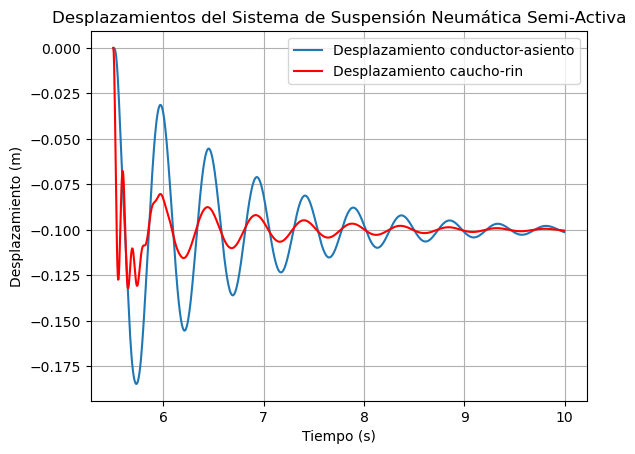

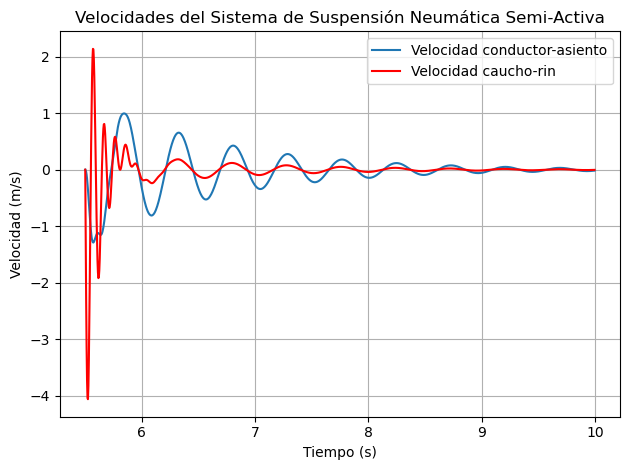

In [5]:
t= np.arange(t0, tf, h)
y = np.zeros((len(t), len(y0)))
y[0] = y0
for i in range(1, len(t)):
    y[i] = rk4_step(f, t[i-1], y[i-1], h)
    
#Desplazamientos
plt.plot(t, y[:, 0], label='Desplazamiento conductor-asiento')
plt.plot(t, y[:, 2], color='r', label='Desplazamiento caucho-rin')
plt.xlabel('Tiempo (s)')
plt.ylabel('Desplazamiento (m)')
plt.legend()
plt.title('Desplazamientos del Sistema de Suspensión Neumática Semi-Activa')
plt.grid(True)
plt.show()

#Velocidades
plt.plot(t, y[:, 1], label='Velocidad conductor-asiento')
plt.plot(t, y[:, 3], color='r', label='Velocidad caucho-rin')
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad (m/s)')
plt.legend()
plt.title('Velocidades del Sistema de Suspensión Neumática Semi-Activa')
plt.grid(True)
plt.tight_layout()
plt.show()

# Conclusiones
La implementación de un modelo de suspensión neumática semi-activa se realizó utilizando el método de Runge-Kutta de cuarto orden en Python. Los resultados de la simulación muestran los desplazamientos y las velocidades de los componentes del sistema bajo una perturbación de entrada de la vía, proporcionando una visión detallada del comportamiento dinámico del sistema de suspensión.

https://ingemecanica.com/tutorialsemanal/tutorialn73.html
https://www.academia.edu/89647334/Aplicaci%C3%B3n_para_la_Evaluaci%C3%B3n_de_un_Sistema_de_Suspensi%C3%B3n_Neum%C3%A1tico_Semi_Activo_basada_en_M%C3%A9todos_Num%C3%A9ricos_de_Euler_Heun_y_Runge_Kutta_de_cuarto_orden_RK4_